### Wrangle and analyse data project

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import json

#### Gathering Data

In [216]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [217]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [218]:
#This file (image_predictions.tsv) is hosted on Udacity's servers and is downloaded programmatically using the Requests library.
programmatically_download = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(programmatically_download,allow_redirects=True)
open('image-predictions.tsv', 'wb').write(r.content)

335079

In [219]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [25]:
from tweepy import OAuthHandler
from timeit import default_timer as timer
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [27]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [28]:
count = 0
fails_dict = {}
start = timer()

In [29]:
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439:

Fail
1680: 682032003584274432
Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713:

Fail
1954: 673662677122719744
Fail
1955: 673656262056419329
Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987:

Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261:

In [31]:
list_of_tweets = []

cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

In [35]:
print("The list of tweets =" ,len(list_of_tweets))
print("The list of tweets no found =" , len(cant_find_tweets_for_those_ids))

The list of tweets = 0
The list of tweets no found = 2356


In [ ]:
list_of_dicts = []
for each_json_tweet in list_of_tweets:
    list_of_dicts.append(each_json_tweet)

In [ ]:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_of_dicts))

In [220]:
#because i can not create a developer account in twitter and there is an error with python file"import tweepy.py" so i will use the tweet_json.txt file you have provided.
#https://stackoverflow.com/questions/28463053/python-3-unicode-to-utf-8-on-file
list_2 = []
with open('tweet_json(1).txt', encoding='utf-8') as json_file:
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        list_2.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(list_2, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

#### Assess Data

In [8]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35521,7511,8868559,18,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30749,5576,8868559,18,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23117,3690,8868559,18,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38813,7695,8868559,18,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37092,8295,8868559,18,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [9]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2330 non-null   object
 1   favorite_count    2330 non-null   int64 
 2   retweet_count     2330 non-null   int64 
 3   followers_count   2330 non-null   int64 
 4   friends_count     2330 non-null   int64 
 5   source            2330 non-null   object
 6   retweeted_status  2330 non-null   object
 7   url               2330 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [10]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [221]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [222]:
sum(image_prediction.jpg_url.duplicated())

66

In [14]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
print(twitter_archive.loc[twitter_archive.rating_numerator == 1176, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 40, 'text']) 
print(twitter_archive['text'][1351])
print(twitter_archive['text'][189])

Series([], Name: text, dtype: object)
1433    Happy Wednesday here's a bucket of pups. 44/40...
Name: text, dtype: object
Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10


In [223]:
#(https://www.kaggle.com/)
pd.concat(g for _, g in image_prediction.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [12]:
tweet_json.retweeted_status.value_counts()

Original tweet       2167
This is a retweet     163
Name: retweeted_status, dtype: int64

In [18]:
tweet_json.source.value_counts()

Twitter for iPhone     2196
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

### Clean Data

##### Quality issues
- change in_reply_to_status_id, in_reply_to_user_id, and tweet_id Dtype from int or float to objects.
- change rating_numerator and rating_denominator from dtype int64 to float64.

In [224]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

In [225]:
twitter_archive_clean = twitter_archive_clean.astype({'tweet_id':str,'in_reply_to_status_id':str,'in_reply_to_user_id':str,'rating_numerator': float,'rating_denominator':float})

#### Test

In [226]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       2356 non-null   object 
 2   in_reply_to_user_id         2356 non-null   object 
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   float64
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [227]:
print(list(twitter_archive_clean))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


#### Tidiness issue
- to remove all rows with non-empty retweeted_status_id, retweeted_status_user_id, or retweeted_status_timestamp.

In [228]:
twitter_archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1235,712668654853337088,nan,nan,2016-03-23 15:53:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sunny and Roxy. They pull things ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712668654...,10.0,10.0,Sunny,None,None,None,None
1821,676582956622721024,nan,nan,2015-12-15 02:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Vinnie. He's having fun while being safe....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676582956...,8.0,10.0,Vinnie,None,None,None,None
465,817181837579653120,nan,nan,2017-01-06 01:31:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a pupper with squeaky hi...,8.159661e+17,4.196984e+09,2017-01-02 17:00:46 +0000,https://twitter.com/dog_rates/status/815966073...,13.0,10.0,None,None,None,pupper,None


In [229]:
twitter_archive_clean.dropna(subset = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,nan,nan,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13.0,10.0,Canela,None,None,None,None
32,886054160059072513,nan,nan,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12.0,10.0,None,None,None,None,None
36,885311592912609280,nan,nan,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13.0,10.0,Lilly,None,None,None,None
68,879130579576475649,nan,nan,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14.0,10.0,Emmy,None,None,None,None
73,878404777348136964,nan,nan,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13.0,10.0,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,nan,nan,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10.0,10.0,Shaggy,None,None,None,None
1043,743835915802583040,nan,nan,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10.0,10.0,None,None,None,None,None
1242,711998809858043904,nan,nan,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12.0,10.0,None,None,None,None,None
2259,667550904950915073,nan,nan,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12.0,10.0,None,None,None,None,None


In [232]:
twitter_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1252,710844581445812225,nan,nan,2016-03-18 15:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Staniel. His selfie game is strong af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710844581...,10.0,10.0,Staniel,None,None,None,None
1180,719339463458033665,nan,nan,2016-04-11 01:41:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lucy and Sophie. They think they'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719339463...,10.0,10.0,Lucy,None,None,None,None
1316,706644897839910912,nan,nan,2016-03-07 00:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. She's tired of the responsibiliti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706644897...,9.0,10.0,Shadow,None,None,None,None
791,773704687002451968,nan,nan,2016-09-08 02:09:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He knows he's adorable. One ear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773704687...,12.0,10.0,Loki,None,None,None,None
1357,703407252292673536,nan,nan,2016-02-27 02:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper doesn't understand gates. 10/10 so...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703407252...,10.0,10.0,None,None,None,pupper,None
508,812503143955202048,nan,nan,2016-12-24 03:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm happy to inform you all that Jake is in ex...,NaN,NaN,NaN,https://m.facebook.com/story.php?story_fbid=18...,13.0,10.0,None,None,None,None,None
2101,670691627984359425,nan,nan,2015-11-28 19:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ester. He has a cocaine problem. This ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670691627...,8.0,10.0,Ester,None,None,None,None
918,756651752796094464,nan,nan,2016-07-23 00:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gert. He just wants you to be happy. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756651752...,11.0,10.0,Gert,None,None,None,None
911,757597904299253760,nan,nan,2016-07-25 15:26:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @jon_hill987: @dog_rates There is a cunning...,7.575971e+17,280479778.0,2016-07-25 15:23:28 +0000,https://twitter.com/jon_hill987/status/7575971...,11.0,10.0,None,None,None,pupper,None
1037,744709971296780288,nan,nan,2016-06-20 01:54:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harvey. He's stealthy af. 10/10 would ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744709971...,10.0,10.0,Harvey,None,None,None,None


#### tidiness issue
- Delete the retweets that won't be used for analysis

In [233]:
# there are 181 values in retweeted_status_id and retweeted_status_user_id.
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_user_id','in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'source',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

In [234]:
#test
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [235]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None


In [150]:
# checking for retweets existance in this file. 
#twitter_archive_clean[twitter_archive_clean.text=='RT @dog_rates:']

#### tidiness issue
- The 4 different columns doggo, floofer, pupper and puppo, are all relative to the same variable that identifies the stage of dog. So we can melt these columns into a single column named "dog stage".

In [236]:
#Twitter_archive
#twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',                                          
#                                                                'timestamp',
#                                                                'text',
#                                                                'rating_numerator',
#                                                                'rating_denominator',
#                                                                'name'],
#                               var_name='dogs_stage', value_name='dogs')
# handle none
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

In [237]:
twitter_archive_clean.sample(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
33,885984800019947520,2017-07-14 22:10:11 +0000,Viewer discretion advised. This is Jimbo. He w...,12.0,10.0,Jimbo,,,,
1416,698635131305795584,2016-02-13 22:29:29 +0000,Here we are witnessing five Guatemalan Birch F...,12.0,10.0,None,,,,
146,863471782782697472,2017-05-13 19:11:30 +0000,RT @dog_rates: Say hello to Quinn. She's quite...,13.0,10.0,Quinn,,,,
467,817120970343411712,2017-01-05 21:29:55 +0000,Name a more iconic quartet... I'll wait. 13/10...,13.0,10.0,None,,,,
1570,687732144991551489,2016-01-14 20:24:55 +0000,This is Ember. That's the q-tip she owes money...,11.0,10.0,Ember,,,,
1428,697616773278015490,2016-02-11 03:02:54 +0000,This pupper doubles as a hallway rug. Very rar...,11.0,10.0,None,,,pupper,
1436,697255105972801536,2016-02-10 03:05:46 +0000,Meet Charlie. He likes to kiss all the big mil...,10.0,10.0,Charlie,,,,
1293,708026248782585858,2016-03-10 20:26:26 +0000,Everybody stop what you're doing and watch thi...,13.0,10.0,None,,,,
76,878057613040115712,2017-06-23 01:10:23 +0000,This is Emmy. She was adopted today. Massive r...,14.0,10.0,Emmy,,,,
1339,704871453724954624,2016-03-02 03:30:25 +0000,I found a forest Pipsy. 12/10 https://t.co/mIQ...,12.0,10.0,None,,,,


In [238]:
# merge into column
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.sample(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
75,878281511006478336,2017-06-23 16:00:04 +0000,Meet Shadow. In an attempt to reach maximum zo...,13.0,10.0,Shadow,,,,,
2041,671542985629241344,2015-12-01 04:14:59 +0000,"This is JD (stands for ""just dog""). He's like ...",10.0,10.0,JD,,,,,
1863,675372240448454658,2015-12-11 17:51:04 +0000,"The tail alone is 13/10. Great dog, better own...",13.0,10.0,None,,,,,
1126,729854734790754305,2016-05-10 02:05:03 +0000,Say hello to Ollie. He conducts this train. He...,11.0,10.0,Ollie,,,,,
1249,711306686208872448,2016-03-19 21:41:44 +0000,What hooligan sent in pictures w/out a dog in ...,3.0,10.0,None,,,,,
1897,674737130913071104,2015-12-09 23:47:22 +0000,Meet Rufio. He is unaware of the pink legless ...,10.0,10.0,Rufio,,,pupper,,pupper
745,780092040432480260,2016-09-25 17:10:10 +0000,RT @dog_rates: This is Hank. He's mischievous ...,8.0,10.0,Hank,,,,,
1934,674014384960745472,2015-12-07 23:55:26 +0000,Say hello to Aiden. His eyes are magical. Love...,11.0,10.0,Aiden,,,,,
287,838561493054533637,2017-03-06 01:26:54 +0000,This is Walter. His owner has been watching al...,13.0,10.0,Walter,,,,,
1559,688547210804498433,2016-01-17 02:23:42 +0000,This is Frönq. He got caught stealing a waffle...,9.0,10.0,Frönq,,,,,


In [239]:
# handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [240]:
# handle missing values
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [241]:
twitter_archive_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1661,683030066213818368,2016-01-01 21:00:32 +0000,This is Lulu. She's contemplating all her unre...,10.0,10.0,Lulu,,,,,NaN
1953,673662677122719744,2015-12-07 00:37:52 +0000,This is Kendall. 12/10 would cuddle the hell o...,12.0,10.0,Kendall,,,,,NaN
102,872620804844003328,2017-06-08 01:06:27 +0000,This is Monkey. She's supporting owners everyw...,13.0,10.0,Monkey,,,,,NaN
512,811744202451197953,2016-12-22 01:24:33 +0000,This is Halo. She likes watermelon. 13/10 http...,13.0,10.0,Halo,,,,,NaN
2324,666421158376562688,2015-11-17 01:02:40 +0000,*internally screaming* 12/10 https://t.co/YMcr...,12.0,10.0,None,,,,,NaN
594,798705661114773508,2016-11-16 01:54:03 +0000,RT @dog_rates: Meet Baloo. He's expecting a fa...,11.0,10.0,Baloo,,,pupper,,pupper
103,872486979161796608,2017-06-07 16:14:40 +0000,We. Only. Rate. Dogs. Do not send in other thi...,12.0,10.0,None,,,,,NaN
1774,678023323247357953,2015-12-19 01:25:31 +0000,After getting lost in Reese's eyes for several...,13.0,10.0,None,,,,,NaN
271,841077006473256960,2017-03-13 00:02:39 +0000,This is Dawn. She's just checking pup on you. ...,12.0,10.0,Dawn,,,,,NaN
1903,674638615994089473,2015-12-09 17:15:54 +0000,This pupper is fed up with being tickled. 12/1...,12.0,10.0,None,,,pupper,,pupper


In [242]:
#twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)

In [243]:
#test
twitter_archive_clean['dog_stage'].value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

### tidiness issue
- column name has multiple values that are not dog names, like 'a', 'the', 'such', etc. so,  lowercase characters and uncorrect names must be deleted.

In [244]:
mask = twitter_archive_clean.name.str.contains('^[a-z]', regex = True)
twitter_archive_clean[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [245]:
lower_dog_name_index = twitter_archive_clean[twitter_archive_clean.name.str.islower()].index

In [246]:
twitter_archive_clean.drop(lower_dog_name_index, inplace=True)

In [247]:
twitter_archive_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
584,800141422401830912,2016-11-20 00:59:15 +0000,This is Peaches. She's the ultimate selfie sid...,13.0,10.0,Peaches,,,,,NaN
576,800859414831898624,2016-11-22 00:32:18 +0000,@SkyWilliams doggo simply protecting you from ...,11.0,10.0,None,doggo,,,,doggo
1539,689661964914655233,2016-01-20 04:13:20 +0000,Meet Luca. He's a Butternut Scooperfloof. Glor...,12.0,10.0,Luca,,,,,NaN
1228,713900603437621249,2016-03-27 01:29:02 +0000,Happy Saturday here's 9 puppers on a bench. 99...,99.0,90.0,None,,,,,NaN
42,884247878851493888,2017-07-10 03:08:17 +0000,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,13.0,10.0,None,,,,,NaN
2070,671122204919246848,2015-11-30 00:22:57 +0000,Two miniature golden retrievers here. Webbed p...,4.0,10.0,None,,,,,NaN
2217,668528771708952576,2015-11-22 20:37:34 +0000,This is Gòrdón. He enjoys his razberrita by po...,12.0,10.0,Gòrdón,,,,,NaN
2056,671357843010908160,2015-11-30 15:59:17 +0000,Tfw she says hello from the other side. 9/10 h...,9.0,10.0,None,,,,,NaN
1432,697482927769255936,2016-02-10 18:11:03 +0000,Meet Blipson. He's a Doowap Hufflepuff. That U...,11.0,10.0,Blipson,,,,,NaN
1892,674754018082705410,2015-12-10 00:54:28 +0000,Just received another perfect photo of dogs an...,12.0,10.0,None,,,,,NaN


#### Quality issue
- convert timestamp from object to datetime type and split it to year, month and day.

In [248]:
#https://stackoverflow.com/questions/22786144/pd-to-datetime-change-date-format-producing-wrong-dates
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

In [249]:
#TEST
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2247 non-null   object 
 1   text                2247 non-null   object 
 2   rating_numerator    2247 non-null   float64
 3   rating_denominator  2247 non-null   float64
 4   name                2247 non-null   object 
 5   doggo               2247 non-null   object 
 6   floofer             2247 non-null   object 
 7   pupper              2247 non-null   object 
 8   puppo               2247 non-null   object 
 9   dog_stage           364 non-null    object 
 10  year                2247 non-null   int64  
 11  month               2247 non-null   int64  
 12  day                 2247 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 245.8+ KB


#### quality issue
- Correct numerators with decimals.

In [250]:
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

#TEST
twitter_archive_clean.sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,year,month,day,rating
258,843604394117681152,This is Hank. He's been outside for 3 minutes ...,11.0,10.0,Hank,,,,,NaN,2017,3,19,11.0
1689,681340665377193984,I've been told there's a slight possibility he...,5.0,10.0,None,,,,,NaN,2015,12,28,5.0
1865,675354435921575936,Everyone needs to watch this. 13/10 https://t....,13.0,10.0,None,,,,,NaN,2015,12,11,13.0
126,868552278524837888,Say hello to Cooper. His expression is the sam...,12.0,10.0,Cooper,,,,,NaN,2017,5,27,12.0
1211,715360349751484417,This is Bertson. He just wants to say hi. 11/1...,11.0,10.0,Bertson,,,,,NaN,2016,3,31,11.0
2003,672475084225949696,This is Buddy. He's photogenic af. Loves to se...,8.0,10.0,Buddy,,,,,NaN,2015,12,3,8.0
1083,738537504001953792,This is Bayley. She fell asleep trying to esca...,11.0,10.0,Bayley,,,,puppo,puppo,2016,6,3,11.0
714,784057939640352768,This is Balto. He's very content. Legendary to...,12.0,10.0,Balto,,,,,NaN,2016,10,6,12.0
46,883360690899218434,Meet Grizzwald. He may be the floofiest floofe...,13.0,10.0,Grizzwald,,floofer,,,floofer,2017,7,7,13.0
394,825829644528148480,This is Toby. He just found out you only prete...,12.0,10.0,Toby,,,,,NaN,2017,1,29,12.0


In [256]:
#twitter_archive_clean.rating.replace('Nan', '', inplace=True)

In [257]:
#twitter_archive_clean = twitter_archive_clean.astype({'rating':int})

In [251]:
# again checking for retweets existance in this file. 
twitter_archive_clean[twitter_archive_clean.text=='RT @dog_rates:']

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,year,month,day,rating


#### quality issue
- Drop 66 jpg_url duplicated.

In [252]:
#Image_prediction
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#TEST
sum(image_prediction_clean['jpg_url'].duplicated())

0

#### tidiness issue
- Delete columns that won't be used for analysis.

In [253]:
#Delete columns
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#TEST
list(image_prediction_clean)

['tweet_id', 'jpg_url']

#### Quality issue
- we will keep original tweets only.

In [254]:
#https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/overview/entities-object
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

#TEST
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2167
Name: retweeted_status, dtype: int64

In [255]:
tweet_json_clean.sample(5)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
1747,678278586130948096,11075,5860,8868523,18,Twitter for iPhone,Original tweet,https://t.co/JK8MByRzgj
1070,736736130620620800,4141,1683,8868610,18,Twitter for iPhone,Original tweet,https://t.co/447tyBN0mW
2254,667393430834667520,181,51,8868584,18,Twitter for iPhone,Original tweet,https://t.co/A37eGLz5WS
2298,666421158376562688,294,102,8868585,18,Twitter for iPhone,Original tweet,https://t.co/YMcrXC2Y6R
20,887705289381826560,27922,4808,8868560,18,Twitter for iPhone,Original tweet,https://t.co/m7BR4JgDrZ


In [256]:
image_prediction_clean_1 = image_prediction_clean.copy()

In [257]:
sum(image_prediction_clean_1['jpg_url'].isnull())

0

In [258]:
image_prediction_clean_1.sample(3)

,tweet_id,jpg_url
1414,771014301343748096,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg
1807,832397543355072512,https://pbs.twimg.com/media/C41FIiAW8AA7lMr.jpg
219,670079681849372674,https://pbs.twimg.com/media/CUyZ6mVW4AI8YWZ.jpg


In [259]:
image_prediction_clean_1.tweet_id.dtypes

dtype('int64')

In [260]:
image_prediction_clean = image_prediction_clean.astype({'tweet_id': str})
twitter_archive_clean = twitter_archive_clean.astype({'tweet_id': str})
tweet_json_clean = tweet_json_clean.astype({'tweet_id': str})

#### Tidiness issue
- concatenate the 3 different sources of tweets into one dataframe.

In [125]:
#https://stackoverflow.com/questions/50649853/trying-to-merge-2-dataframes-but-get-valueerror
#df_twitter = pd.concat([twitter_archive_clean,image_prediction_clean, tweet_json_clean], axis=1, sort=False)

#TEST
#df_twitter.info()

In [261]:
de_twitter_1 = pd.merge(twitter_archive_clean, image_prediction_clean, on='tweet_id', how = 'outer')

In [262]:
df_twitter_2 = pd.merge(de_twitter_1,tweet_json_clean, on='tweet_id',how = 'outer')

In [263]:
df_twitter_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2352
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2353 non-null   object 
 1   text                2247 non-null   object 
 2   rating_numerator    2247 non-null   float64
 3   rating_denominator  2247 non-null   float64
 4   name                2247 non-null   object 
 5   doggo               2247 non-null   object 
 6   floofer             2247 non-null   object 
 7   pupper              2247 non-null   object 
 8   puppo               2247 non-null   object 
 9   dog_stage           364 non-null    object 
 10  year                2247 non-null   float64
 11  month               2247 non-null   float64
 12  day                 2247 non-null   float64
 13  rating              2247 non-null   float64
 14  jpg_url             2009 non-null   object 
 15  favorite_count      2167 non-null   float64
 16  retwee

In [264]:
df_twitter_2

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,...,day,rating,jpg_url,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,,,,NaN,...,1.0,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,35521.0,7511.0,8868559.0,18.0,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,,,,NaN,...,1.0,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,30749.0,5576.0,8868559.0,18.0,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,,,,NaN,...,31.0,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,23117.0,3690.0,8868559.0,18.0,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,,,,NaN,...,30.0,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,38813.0,7695.0,8868559.0,18.0,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,,,,NaN,...,29.0,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,37092.0,8295.0,8868559.0,18.0,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348,736392552031657984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,17278.0,7168.0,8868610.0,18.0,Vine - Make a Scene,Original tweet,https://t.co/u1ulQ5heLX
2349,715758151270801409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3623.0,1388.0,8868613.0,18.0,Vine - Make a Scene,Original tweet,https://t.co/wJX74TSgzP
2350,703041949650034688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25722.0,12133.0,8868620.0,18.0,Twitter for iPhone,Original tweet,https://t.co/iHe6liLwWR
2351,674307341513269249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10784.0,6556.0,8868562.0,18.0,Vine - Make a Scene,Original tweet,https://t.co/SroTpI6psB


In [205]:
df_twitter_clean= df_twitter.copy()
#df_twitter_clean_1 = df_twitter_clean_1.drop(['text']['RT @dog_rates:'])

#### Quality issue
- removing retweets which affect on results of analysis.

In [206]:
# to drop all retweets from final dataframe
#df_twitter_clean = df_twitter_clean[~df_twitter_clean.text.str.contains('RT @dog_rates')]

In [265]:
rating = df_twitter_2.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

In [266]:
rating

,rating_numerator,rating_denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2348,NaN,NaN
2349,NaN,NaN
2350,NaN,NaN
2351,NaN,NaN


In [267]:
rating = rating.astype({'rating_numerator': float,'rating_denominator':float})

In [268]:
rating = rating.dropna(subset = ['rating_numerator','rating_denominator'])

In [269]:
df_twitter_2['ratings'] = 10 * rating['rating_numerator'] / rating['rating_denominator']

In [270]:
df_twitter_2

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,...,rating,jpg_url,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url,ratings
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,,,,NaN,...,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,35521.0,7511.0,8868559.0,18.0,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU,13.0
1,892177421306343426,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,,,,NaN,...,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,30749.0,5576.0,8868559.0,18.0,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L,13.0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,,,,NaN,...,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,23117.0,3690.0,8868559.0,18.0,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy,12.0
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,,,,NaN,...,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,38813.0,7695.0,8868559.0,18.0,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ,13.0
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,,,,NaN,...,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,37092.0,8295.0,8868559.0,18.0,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348,736392552031657984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17278.0,7168.0,8868610.0,18.0,Vine - Make a Scene,Original tweet,https://t.co/u1ulQ5heLX,NaN
2349,715758151270801409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3623.0,1388.0,8868613.0,18.0,Vine - Make a Scene,Original tweet,https://t.co/wJX74TSgzP,NaN
2350,703041949650034688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,25722.0,12133.0,8868620.0,18.0,Twitter for iPhone,Original tweet,https://t.co/iHe6liLwWR,NaN
2351,674307341513269249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10784.0,6556.0,8868562.0,18.0,Vine - Make a Scene,Original tweet,https://t.co/SroTpI6psB,NaN


In [230]:
#twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',                                          
#                                                                'timestamp',
#                                                                'text',
#                                                                'rating_numerator',
#                                                                'rating_denominator',
#                                                                'name'],
#                               var_name='dogs_stage', value_name='dogs')

In [45]:
# to recalculate rating after doing filtering of dataframe
#df_twitter_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

In [47]:
#list(df_twitter_clean.name)

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Jed',
 'None',
 'Sebastian',
 'None',
 'Sierra',
 'None',
 'None',
 'None',
 'Monkey',
 'None',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'No

In [277]:
#df_twitter_clean_1 = df_twitter_clean.copy()
#df_twitter_clean_1

#### visualization and sorting

In [271]:
#Sorting,analysis and visualizing
df_twitter_2.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

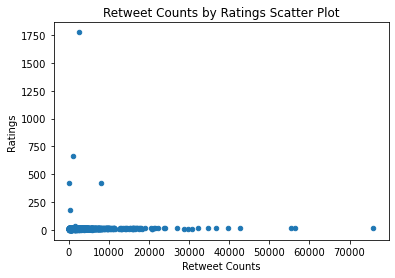

In [272]:
df_twitter_2.plot(x='retweet_count', y='ratings', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

In [53]:
twitter_archive_clean.max()

tweet_id                                             892420643555336193
text                  😂😂😂 10/10 for the dog and the owner https://t....
rating_numerator                                                 1776.0
rating_denominator                                                170.0
name                                                               very
dogs_stage                                                        puppo
year                                                               2017
month                                                                12
day                                                                  31
rating                                                              inf
dtype: object

In [54]:
twitter_archive_clean.min()

tweet_id                                             666020888022790149
text                  "AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOV...
rating_numerator                                                    0.0
rating_denominator                                                  0.0
name                                                               Abby
dogs_stage                                                        doggo
year                                                               2015
month                                                                 1
day                                                                   1
rating                                                              0.0
dtype: object